# The Sparks Foundation - GRIP

## Name - Merlin Nissi Babu

## Task 1: Prediction using supervised Machine Learning

## Predict the percentage of an student based on the no. of study hours.
In this task we have to find the students scores based on their study hours. This is simple regression problem type because it has only two variables. This problem can be solved by using regression libraries or we can make regression algorithm


### Importing required libraries

In [39]:
# Import required packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns

### Load the Dataset

In [30]:
df= pd.read_csv(r'C:\Users\merli\Desktop\student_scores - student_scores.csv')

In [31]:
#Displaying the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Description

In [35]:
print('The size of Dataframe is: ', df.shape)

The size of Dataframe is:  (25, 2)


In [33]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [37]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):

    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(df)

,Total,Percent
Hours,0,0.0
Scores,0,0.0


As from above dataframe, my observation on missing data are:

    There is no missing values in our dataset.
    Therefore there is no need of data cleaning.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Plotting

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0, 0.5, 'Percentage acquired')

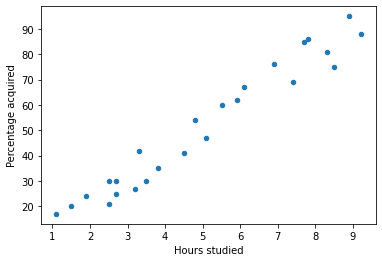

In [6]:
#plotting Dataframe
import matplotlib.pyplot as plt
df.plot(x='Hours', y='Scores', kind='scatter')
plt.title=('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage acquired')

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


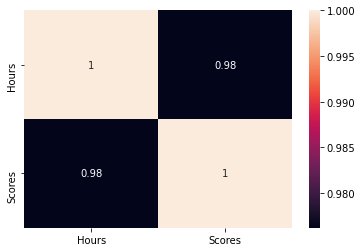

In [46]:
# Heatmap for correlation between the variables
sns.heatmap(data= df.corr(), annot= True, linecolor='black')

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
#splitting the dataset into input attributes and output labels
X = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (20, 1)
X_tests shape:  (5, 1)
y_train shape:  (20,)
y_test shape:  (5,)


### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression
regn = LinearRegression()
regn.fit(X_train,y_train)

print('Training Completed')

Training Completed


In [14]:
line = regn.coef_* X+regn.intercept_

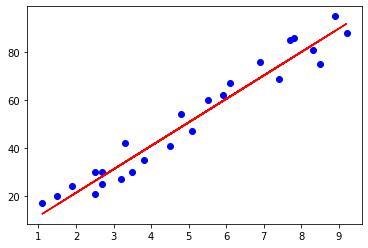

In [21]:
plt.scatter(X,y, color = 'b')
plt.plot(X, line, color = 'r')

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [23]:
print(X_test) # Testing data - In Hours

[[5.9]
 [2.5]
 [3.3]
 [6.9]
 [1.1]]


In [24]:
y_pred = regn.predict(X_test)
print(y_pred)

[59.52447592 26.21283376 34.05086721 69.32201774 12.49627523]


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,62,59.524476
1,21,26.212834
2,42,34.050867
3,76,69.322018
4,17,12.496275


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [44]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
R2 = metrics.r2_score(y_test,y_pred)

print("Mean Squared Error      = ",mse)
print("Root Mean Squared Error = ",rmse)
print("Mean Absolute Error     = ",mae)
print("R squared value         = ",R2)
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_pred))

Mean Squared Error      =  32.273910267082535
Root Mean Squared Error =  5.681013137379858
Mean Absolute Error     =  5.3638395331398865
R squared value         =  0.9381536289531609

Explaned Variance Score:  0.9587536466189552


#### Model Accuracy is 95.87%

### Predicting Score if a student studies for 9.25 hrs/day

In [19]:
# Testing with some new data
hours = float(input("Enter the Study Hours : "))
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regn.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Study Hours : 9.5
No of Hours = 9.5
Predicted Score = 94.7956264467121


# THANK YOU !!!